In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [3]:
file_cars = pd.read_csv("cars.csv")
file_cars

,Price,Mileage,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...
799,16507.07027,16229,Sedan,6,3.0,4,1,0,0
800,16175.95760,19095,Sedan,6,3.0,4,1,1,0
801,15731.13290,20484,Sedan,6,3.0,4,1,1,0
802,15118.89323,25979,Sedan,6,3.0,4,1,1,0


In [4]:
file_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Type      804 non-null    object 
 3   Cylinder  804 non-null    int64  
 4   Liter     804 non-null    float64
 5   Doors     804 non-null    int64  
 6   Cruise    804 non-null    int64  
 7   Sound     804 non-null    int64  
 8   Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 56.7+ KB


In [5]:
file_cars.isnull().sum()

Price       0
Mileage     0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [6]:
file_cars.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073875,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995020,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316635,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466720,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


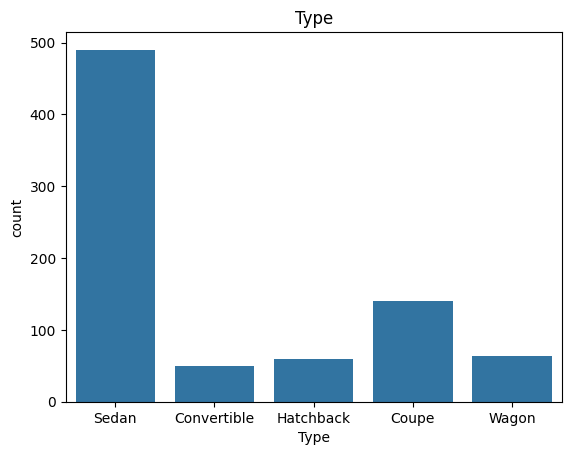

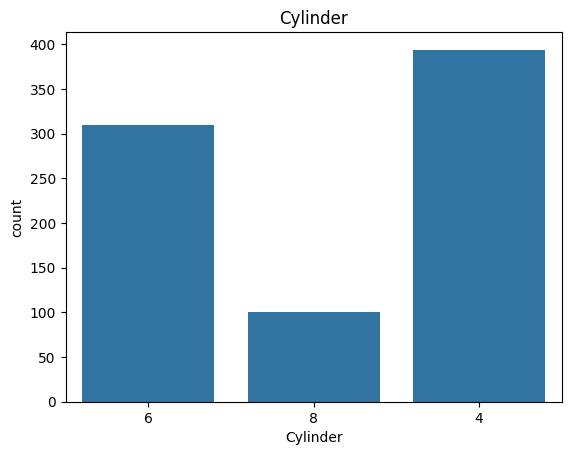

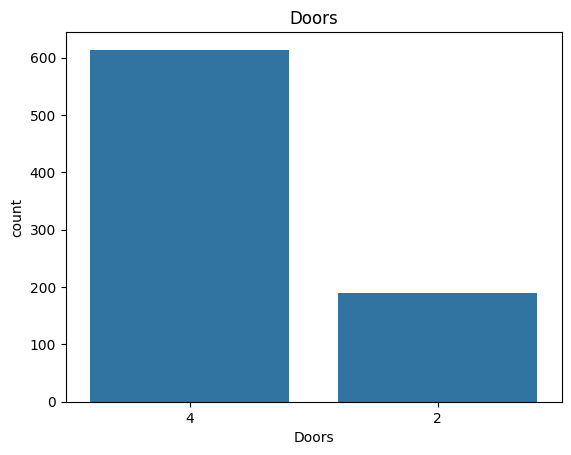

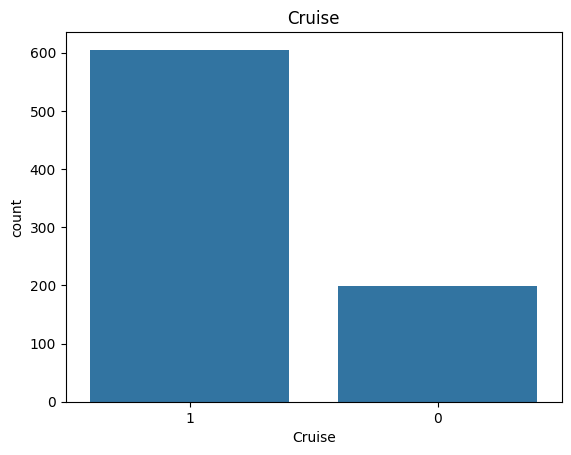

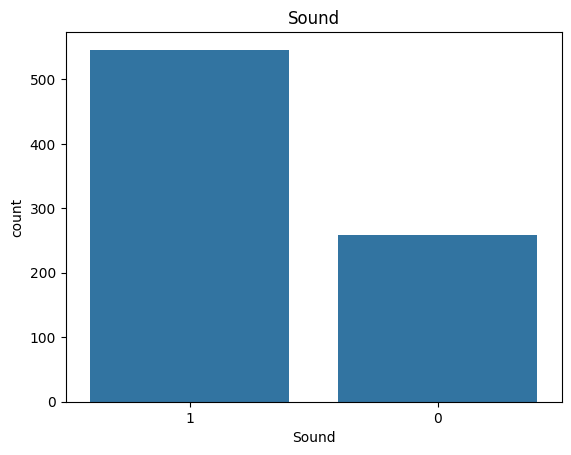

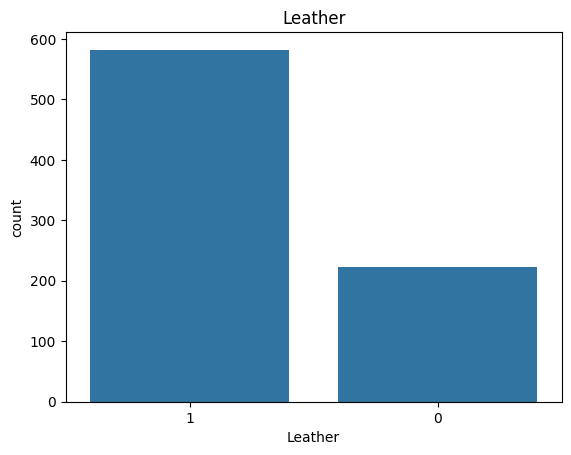

In [54]:
cat_cols = ['Type', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']

for col in cat_cols:
    file_cars[col] = file_cars[col].astype(str)
    sns.countplot(x=col, data=file_cars)
    plt.title(col)
    plt.show()

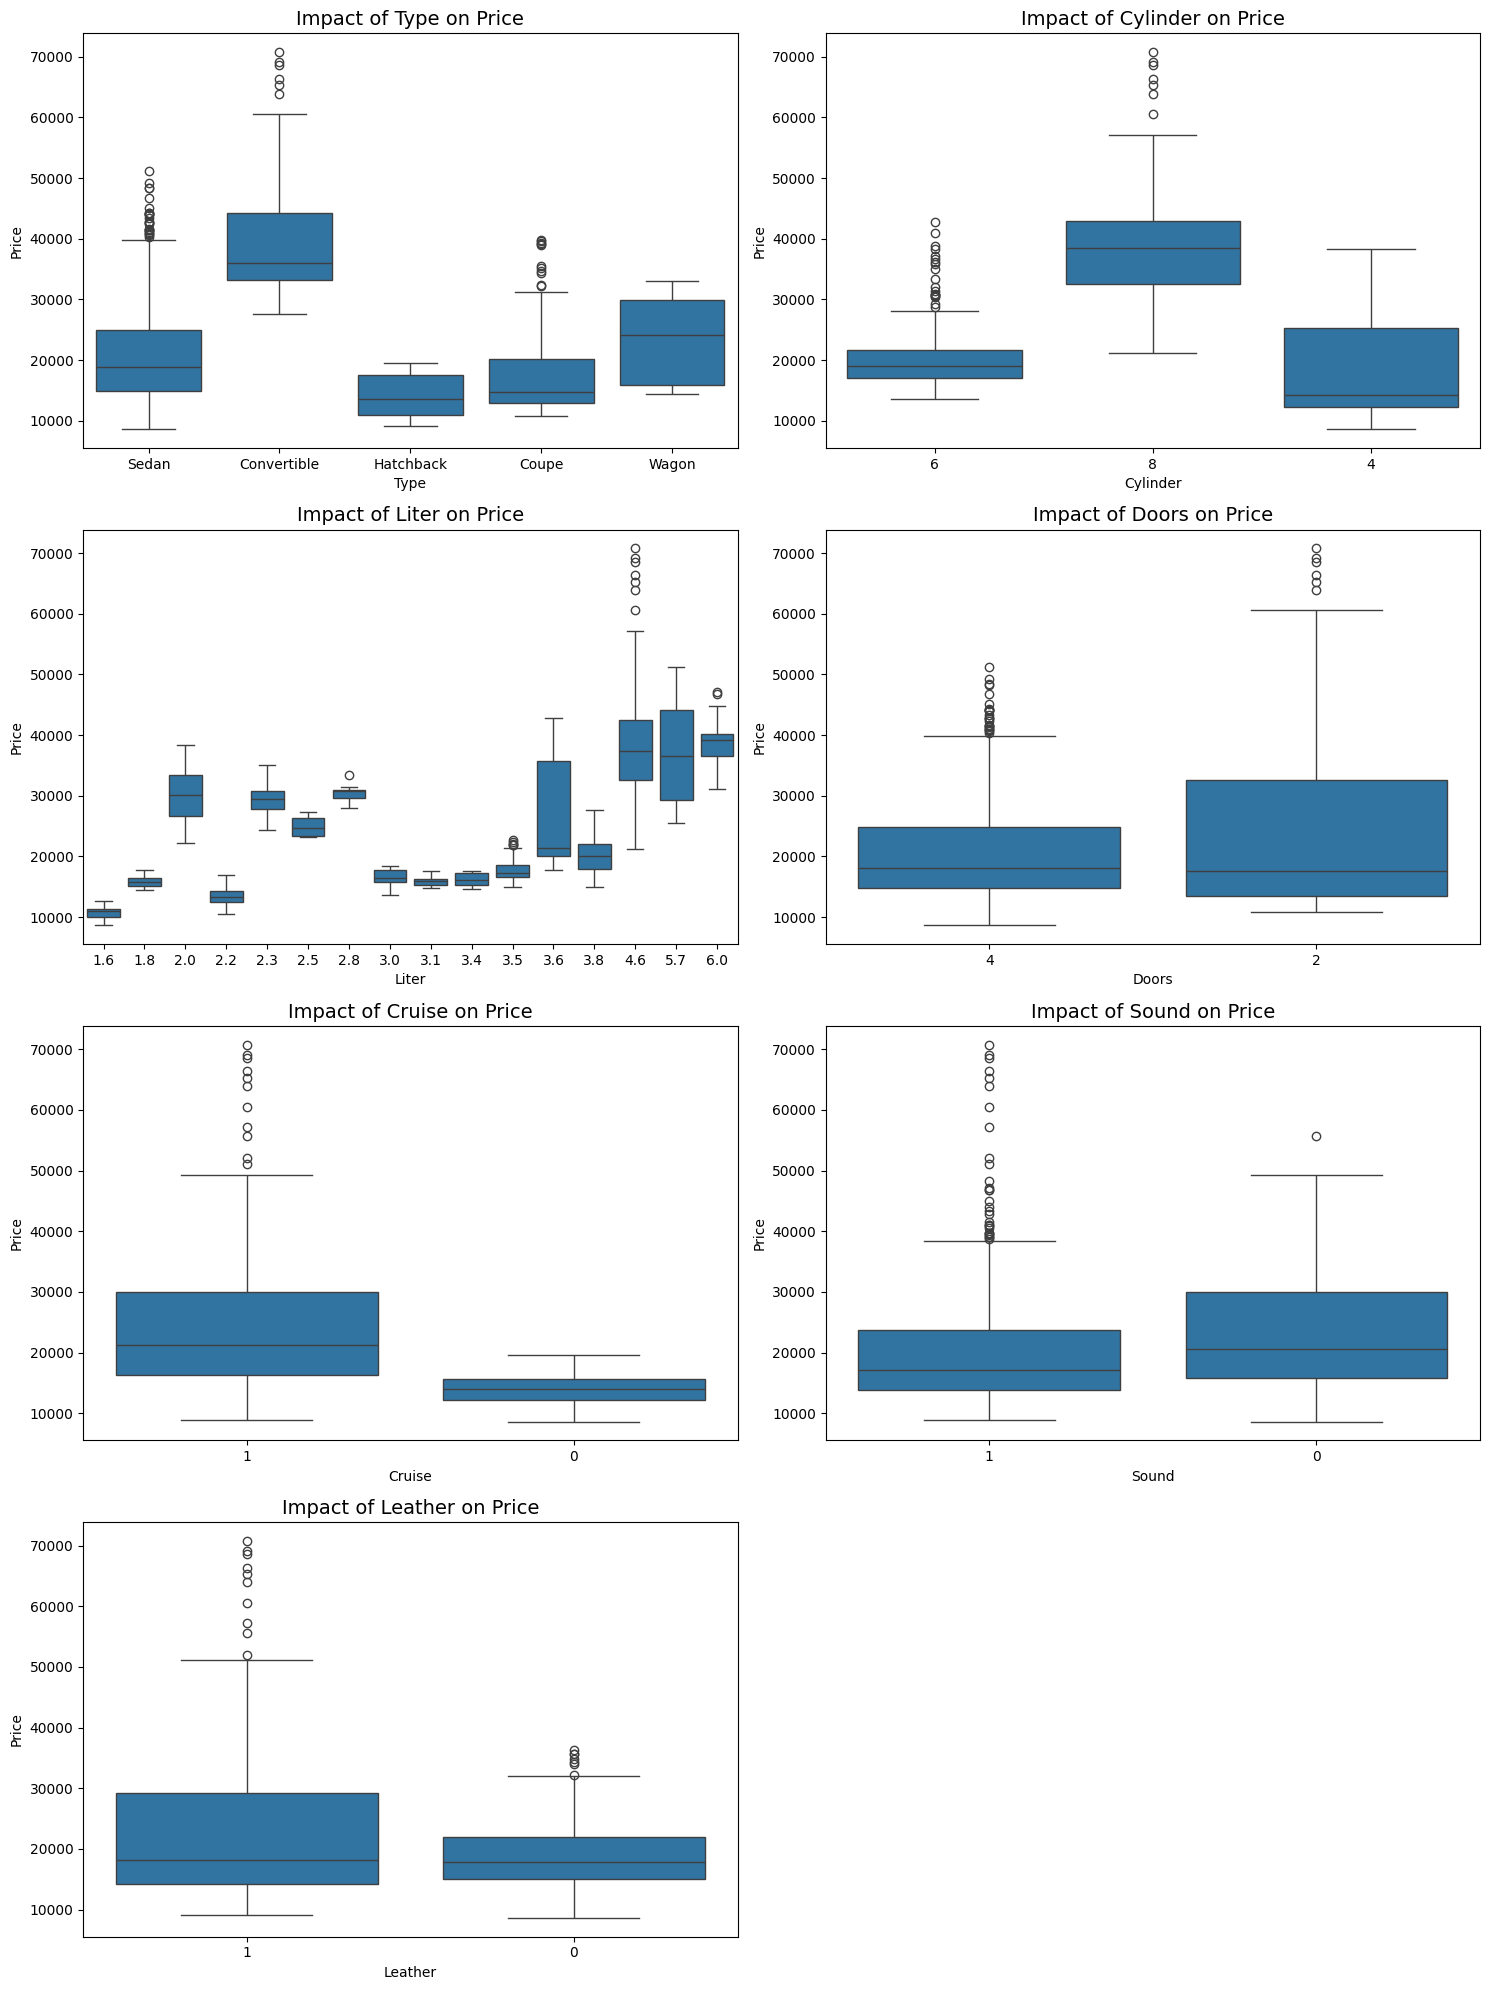

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

axes = axes.flatten()

# Loop through your columns and create a boxplot for each
for i, col in enumerate(cols):
    sns.boxplot(data=file_cars, x=col, y="Price", ax=axes[i])
    axes[i].set_title(f"Impact of {col} on Price", fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Price")

fig.delaxes(axes[7])

plt.tight_layout()
plt.show()

Here we can witness that the variance between the prices of each features and their categories vary.

But more important features - <b>Cruise, Liter, Type & Cylinder

In [32]:
file_cars.corr(numeric_only=True)

,Price,Mileage,Liter
Price,1.000000,-0.143051,0.558146
Mileage,-0.143051,1.000000,-0.018641
Liter,0.558146,-0.018641,1.000000


In [12]:
for item in ['Type', 'Cylinder', 'Liter', 'Doors', 'Cruise','Sound', 'Leather']:
    print(file_cars[item].value_counts())
    print(" ")

Type
Sedan          490
Coupe          140
Wagon           64
Hatchback       60
Convertible     50
Name: count, dtype: int64
 
Cylinder
4    394
6    310
8    100
Name: count, dtype: int64
 
Liter
2.2    190
3.8    160
3.5     80
4.6     60
2.0     60
1.6     60
2.3     50
3.6     30
1.8     30
6.0     20
5.7     20
3.1     10
2.8     10
3.4     10
3.0     10
2.5      4
Name: count, dtype: int64
 
Doors
4    614
2    190
Name: count, dtype: int64
 
Cruise
1    605
0    199
Name: count, dtype: int64
 
Sound
1    546
0    258
Name: count, dtype: int64
 
Leather
1    582
0    222
Name: count, dtype: int64
 


<Axes: title={'center': 'Price distribution'}>

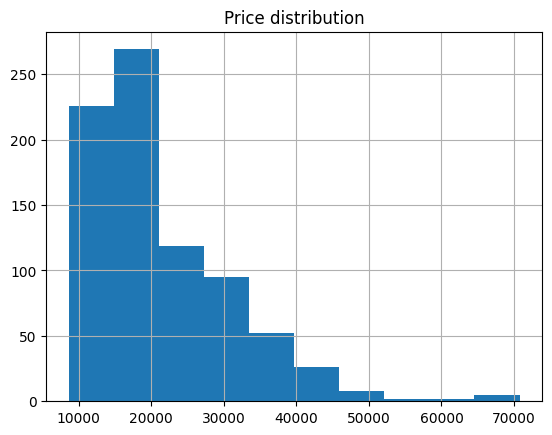

In [ ]:
plt.title("Price distribution")
file_cars["Price"].hist()


The mileage with the price has a very poor correlation with the price.

Though it is a very good thing to predict but in our case it is not helpful

F_stat = 88.5107443803999
p_value = 2.834108008093971e-62


<Axes: xlabel='Type', ylabel='Price'>

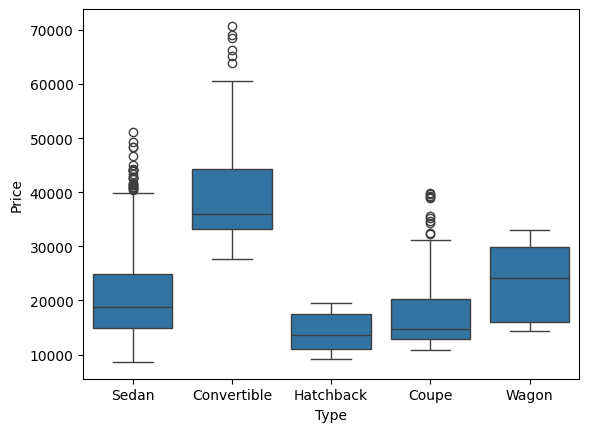

In [53]:
from scipy.stats import f_oneway

group1 = []

for c in file_cars["Type"].unique():
    group1.append(file_cars[file_cars['Type']==c]["Price"])


f_stat, p_value = f_oneway(*group)

print(f"F_stat = {f_stat}")
print(f"p_value = {p_value}")

sns.boxplot(x='Type', y='Price', data=file_cars)


F_stat = 15.742747175375005
p_value = 7.9064600261704e-05


<Axes: xlabel='Doors', ylabel='Price'>

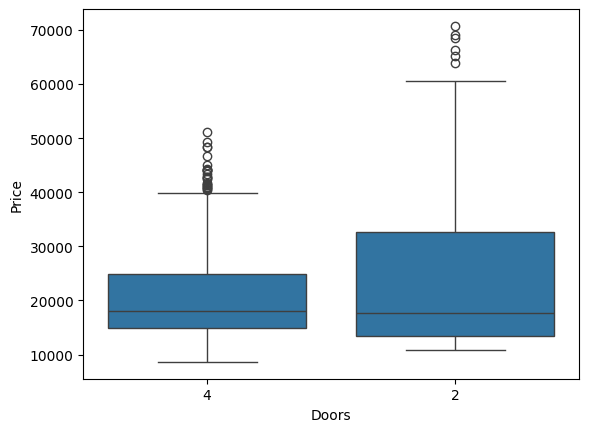

In [52]:
group2 = []

for c in file_cars["Doors"].unique():
    group2.append(file_cars[file_cars['Doors']==c]["Price"])


f_stat1, p_value1 = f_oneway(*group2)

print(f"F_stat = {f_stat1}")
print(f"p_value = {p_value1}")

sns.boxplot(x='Doors', y='Price', data=file_cars)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()

file_cars["Type"] = le.fit_transform(file_cars["Type"])

file_cars

,Price,Mileage,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,3,6,3.1,4,1,1,1
1,17542.03608,9135,3,6,3.1,4,1,1,0
2,16218.84786,13196,3,6,3.1,4,1,1,0
3,16336.91314,16342,3,6,3.1,4,1,0,0
4,16339.17032,19832,3,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...
799,16507.07027,16229,3,6,3.0,4,1,0,0
800,16175.95760,19095,3,6,3.0,4,1,1,0
801,15731.13290,20484,3,6,3.0,4,1,1,0
802,15118.89323,25979,3,6,3.0,4,1,1,0


In [64]:
cols = ['Liter', 'Cruise', 'Sound', 'Leather']
for item in cols:
    file_cars[item] = file_cars[item].astype(int)

In [66]:
file_cars

,Price,Mileage,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,3,6,3,4,1,1,1
1,17542.03608,9135,3,6,3,4,1,1,0
2,16218.84786,13196,3,6,3,4,1,1,0
3,16336.91314,16342,3,6,3,4,1,0,0
4,16339.17032,19832,3,6,3,4,1,0,1
...,...,...,...,...,...,...,...,...,...
799,16507.07027,16229,3,6,3,4,1,0,0
800,16175.95760,19095,3,6,3,4,1,1,0
801,15731.13290,20484,3,6,3,4,1,1,0
802,15118.89323,25979,3,6,3,4,1,1,0


In [59]:
features = file_cars.drop(columns="Price", axis=1)
Label = file_cars["Price"]
features

,Mileage,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,3,6,3.1,4,1,1,1
1,9135,3,6,3.1,4,1,1,0
2,13196,3,6,3.1,4,1,1,0
3,16342,3,6,3.1,4,1,0,0
4,19832,3,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...
799,16229,3,6,3.0,4,1,0,0
800,19095,3,6,3.0,4,1,1,0
801,20484,3,6,3.0,4,1,1,0
802,25979,3,6,3.0,4,1,1,0


In [68]:
from sklearn.compose import ColumnTransformer


cat_cols = ['Type', 'Cylinder', 'Doors']
num_cols = ['Liter', 'Cruise', 'Sound', 'Leather']

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

In [89]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    features,
    Label,
    random_state=10,
    test_size=0.3
)

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


pipe_anova = Pipeline([
    ('prep', preprocessor),
    ('anova', SelectKBest(score_func=f_regression, k=20)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

In [87]:
pipe_anova.fit(x_train, y_train)

C:\Users\Rishi Roychowdhury\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=11. All the features will be returned.
  warnings.warn(


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('anova', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers conta

In [90]:
score_anova = pipe_anova.score(x_test, y_test)

print(pipe_anova.score(x_train, y_train))
print(score_anova)

0.711609216566389
0.7125868192590821


In [76]:
from sklearn.feature_selection import RFE

pipe_anova_rfe = Pipeline([
    ('prep', preprocessor),
    ('anova', SelectKBest(score_func=f_regression, k=20)),
    ('scaler', StandardScaler()),
    ('rfe', RFE(
        estimator=LinearRegression(),
        n_features_to_select=10
    )),
    ("model", LinearRegression())
])

In [97]:
pipe_anova_rfe.fit(x_train, y_train)

C:\Users\Rishi Roychowdhury\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=11. All the features will be returned.
  warnings.warn(


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('anova', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers conta

In [98]:
print(pipe_anova_rfe.score(x_train, y_train))

print(pipe_anova_rfe.score(x_test, y_test))

0.7147567352972588
0.70849035950645
